# Test Sorensen-Dice Coefficient 3D pooling calculation using leopardgecko.py

In [1]:
import leopardgecko as lg
import os
import numpy as np
import matplotlib.pyplot as plt
import dask.array as da
import h5py


In [2]:
#open files and throw them to test

#use predicted data and ground truth data
filename = "/workspace/for_luis/Programming/BenchmUsingGasHydrateData/2021-03-11_predicted_volumes/2021-03-12_final_12_volumes_combined.h5"
fx= h5py.File(filename,'r')
data1_da = da.from_array(fx['data'], chunks='auto')

filename = "/workspace/for_luis/Programming/BenchmUsingGasHydrateData/labels_binary.h5"
fx= h5py.File(filename,'r')
data2_da = da.from_array(fx['data'], chunks='auto')


In [3]:

SDC = lg.SorensenDiceCoefficientCalculator3DPool(data1_da , 8 , data2_da, 0.5 , 512, 256, 128)

Calculating elementwise d1==d2
AvgPool3D_LargeData of neq_d1d2


NameError: name 'self' is not defined

In [3]:
data1_thresh=8
data2_thresh = 0.5

data1_th_bool = da.where(data1_da < data1_thresh , False ,True)
data2_th_bool = da.where(data2_da < data2_thresh , False ,True)

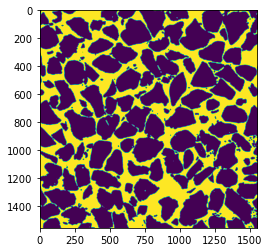

In [4]:
plt.imshow(data2_th_bool[20,:,:])

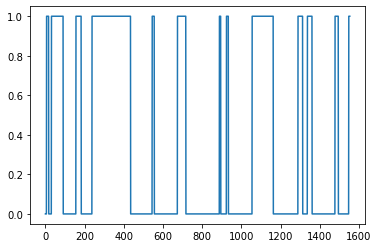

In [5]:
plt.plot(data2_th_bool[20,20,:])

In [6]:
print("Calculating elementwise d1==d2")
neq_d1d2_bool= da.equal(data1_th_bool , data2_th_bool)

Calculating elementwise d1==d2


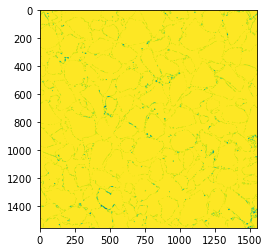

In [7]:
plt.imshow(neq_d1d2_bool[20,:,:])

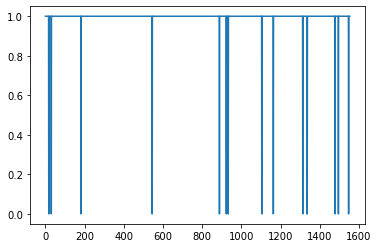

In [8]:
plt.plot(neq_d1d2_bool[20,20,:])

In [9]:
#Convert
neq_d1d2 = neq_d1d2_bool.astype('float')

In [10]:
#Do calculation similar to average pooling, but get the sum back by multiplying by the volume (number of elements)
print("AvgPool3D_LargeData of neq_d1d2")
SDnumerator_SC = lg.AvgPool3D_LargeData( neq_d1d2 , 512 , 256 , 128 )

AvgPool3D_LargeData of neq_d1d2


In [12]:
data1_th = data1_th_bool.astype('float')
print("AvgPool3D_LargeData of data1_th")
SDden_d1_SC = lg.AvgPool3D_LargeData( data1_th , 512 , 256 , 128 )


AvgPool3D_LargeData of data1_th


In [14]:
data2_th = data2_th_bool.astype('float')
print("AvgPool3D_LargeData of data1_th_int")
SDden_d2_SC = lg.AvgPool3D_LargeData( data2_th ,  512 , 256 , 128 )


AvgPool3D_LargeData of data1_th_int


In [16]:
#Calculates the SD coefficient on the pooled data, pixelwise
SDCoeffRes = lg.ScoreData( 2*SDnumerator_SC.data3d /( SDden_d1_SC.data3d + SDden_d2_SC.data3d ) , \
    SDnumerator_SC.zVolCentres, SDnumerator_SC.yVolCentres , SDnumerator_SC.xVolCentres )

In [17]:
SDCoeffRes.data3d.shape

(14, 11, 11)

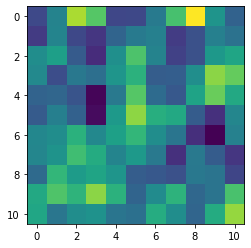

In [19]:
#TODO
plt.imshow(SDCoeffRes.data3d[5,:,:])

In [21]:
hist, bins = SDCoeffRes.getHistogram()

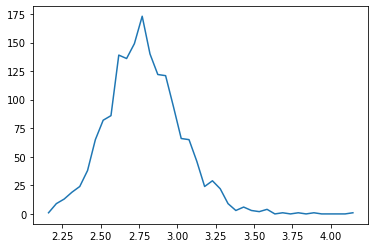

In [22]:
plt.plot(bins,hist)

In [ ]:
#TODO: This SDCoeff calculation seems to be working. Implement in leopardgecko (autosave autoload) and
#add plots ofhistogram
#and finally plot SDC vs CS